# Project 4 Machine Learning

## Analisis Sentimen pada Ulasan Aplikasi Shopee di Google Play Store

- Raikhan Noer (4112320016)
- Ines Savitri (4112320039)
- Liopi Purwati (4112320042)

In [1]:
import pandas as pd

# Membaca file
df = pd.read_csv('shopee.csv')
df

,label,text
0,5,Was pleasantly surprised with the same night d...
1,5,This is the cheapest Authentic cricut I can fi...
2,5,Love the material and worth the price! Can't w...
3,5,Very fast delivery. Easily assembled and stur...
4,2,The ink is quite faint ....
...,...,...
9995,4,Item arrived prominently. Comfortable to wear ...
9996,5,"Only downfall, pointed side has no function"
9997,5,Game received. Able to login and play.
9998,3,i feel like it’d be better if we can choose th...


## A. Pengenalan

### Analisis Sentimen

Analisis sentimen adalah proses menganalisis teks digital untuk menentukan apakah nada emosional pesan tersebut positif, negatif, atau netral. Saat ini, perusahaan memiliki data teks dalam volume besar seperti email, transkrip obrolan dukungan pelanggan, komentar media sosial, dan ulasan. Alat analisis sentimen dapat memindai teks ini untuk secara otomatis menentukan sikap penulis terhadap suatu topik. Perusahaan menggunakan wawasan dari analisis sentimen untuk meningkatkan mutu layanan pelanggan dan meningkatkan reputasi merek.

### Aplikasi Shopee

Shopee adalah platform belanja online terdepan di Asia Tenggara dan Taiwan. Diluncurkan tahun 2015, Shopee merupakan sebuah platform yang disesuaikan untuk tiap wilayah dan menyediakan pengalaman berbelanja online yang mudah, aman, dan cepat bagi pelanggan melalui dukungan pembayaran dan logistik yang kuat. Aplikasi shopee dapat diakses secara mudah dengan menggunakan smartphone. Shopee hadir dalam bentuk aplikasi yang memudahkan penggunanya dalam melakukan kegiatan berbelanja secara online tanpa menggunakan perangkat komputer. Shopee hadir dengan menawarkan berbagai macam produk-produk untuk kebutuhan sehari-hari. 

Aplikasi Shopee bisa didownload melalui Google Playstore atau Apps Store untuk iOS. Pelanggan yang telah mendownload bisa memberikan ulasan terkait pengalaman menggunakan sebuah aplikasi yang telah di download pada Google Playstore maupun Apps Store. Hasil dari ulasan pelanggan yang akan menentukan sebaik atau seburuk apa aplikasi tersebut.

### Tentang Dataset

Data Ulasan Shopee ini berasal dari kaggle dataset, https://www.kaggle.com/datasets/shymammoth/shopee-reviews. Data ini berisi sebanyak 10000 baris data dan 2 kolom.

Tujuan dari penelitian ini adalah mengetahui sentimen dari ulasan pengguna aplikasi Shopee pada Google Playstore. 

### Deskripsi variabel

- label : berisi rating dari pengguna yang telah menggunakan aplikasi Shopee
- text : ulasan pengguna yang telah menggunakan aplikasi Shopee

## B. Import Library

In [2]:
!pip install Sastrawi

In [3]:
!pip install wordcloud pandas

In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import csv
import sys

nltk.download('stopwords')
nltk.download ('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS

words = set(nltk.corpus.words.words())
stopwords = set(stopwords.words('english'))
stopwordsUpdated = set(STOPWORDS)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string, unicodedata
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PF3KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\PF3KK\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PF3KK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PF3KK\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## C. Data Loading

In [5]:
# Membaca file
df = pd.read_csv('shopee.csv')

# Membuka file
df.head()

,label,text
0,5,Was pleasantly surprised with the same night d...
1,5,This is the cheapest Authentic cricut I can fi...
2,5,Love the material and worth the price! Can't w...
3,5,Very fast delivery. Easily assembled and stur...
4,2,The ink is quite faint ....


In [6]:
# Mengetahui jumlah data dan kolom
df.shape

(10000, 2)

Berdasarkan output di atas, dapat diketahui bahwa pada data ini terdapat 10000 baris data dan 2 kolom

In [7]:
# Mengetahui type data
df.dtypes

label     int64
text     object
dtype: object

In [8]:
# Mengetahui nilai unik kolom label
unique_values = df['label'].unique()
unique_values

array([5, 2, 4, 3, 1], dtype=int64)

Dari kolom 'label' diketahui type data yaitu integer, disini terdapat 5 nilai yang menunjukkan rating dari pengalaman pengguna menggunakan aplikasi shopee

In [9]:
# Mengetahui nilai unik kolom text
unique_value = df['text'].unique()
unique_value

array(['Was pleasantly surprised with the same night delivery. Thk you seller.\n\nEach box comes with 2 masks and a packet of filters. (Picture shows 1 per box as my kids wearing the other 1). Fits well and are comfortable. The filter inserts doing its job to protect my children. Will definitely order more. ',
       'This is the cheapest Authentic cricut I can find online. Even cheaper than overseas. Highly recommended. Most importantly, the customer service of the seller is superb. Really won’t go wrong purchasing from them. 👍🏻👍🏻',
       "Love the material and worth the price! Can't wait to put on my baby!",
       ..., 'Game received. Able to login and play. ',
       'i feel like it’d be better if we can choose the designs and not given by random cos i didn’t like this design LOLLLLL sigh but that’s fine. fast delivery! (:',
       'Bought from the seller for a 2nd time because they missed out 1 item from my previous order.. was told that the missed out item will be shipped out wi

Dari kolom 'text' diketahui type data yaitu object, berisi ulasan pengguna yang menggunakan aplikasi shopee

## D. Exploratory Data Analysis (EDA)

In [10]:
# Mengetahui jumlah data kolom label
df['label'].value_counts()

5    8737
4     656
3     296
1     185
2     126
Name: label, dtype: int64

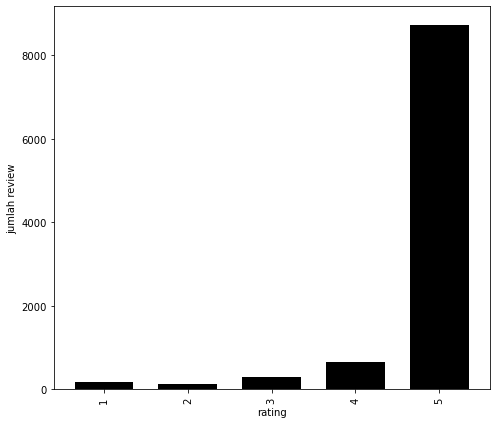

In [11]:
# Visualisasi data kolom label
import matplotlib.pyplot as plt

_, ax1 = plt.subplots(figsize=(7,6))
stars_histogram = df['label'].value_counts().sort_index()
stars_histogram.plot(kind='bar', width=0.7, color='black')
plt.xlabel('rating')
plt.ylabel('jumlah review')

plt.tight_layout()
plt.show()

Berdasarkan gambar di atas, dapat kita ketahui jumlah dari masing-masing rating yang diisi pelanggan pengguna aplikasi shopee yaitu:
- bintang 1 sebanyak 185 pengguna
- bintang 2 sebanyak 126 pengguna
- bintang 3 sebanyak 296 pengguna
- bintang 4 sebanyak 656 pengguna
- bintang 5 sebanyak 8737 pengguna

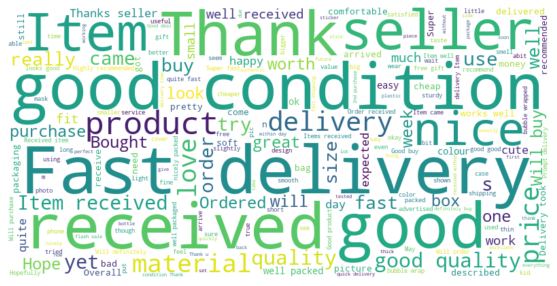

In [12]:
# Visualisasi wordcloud
text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Berdasarkan gambar di atas dapat diketahui ulasan pengguna paling banyak mengatakan bahwa barang yang diterima dengan cepat, barang dalam kondisi baik, diterima dengan baik dan berterima kasih pada penjual

## E. Text Pre-processing

### Cek Data Duplikat

Tahap ini akan mengidentifikasi dan menghapus duplikasi data dalam dataset. Duplikasi dapat mengganggu analisis dan menghasilkan bias dalam model yang dibangun

In [13]:
# Mengetahui apakah terdapat duplikasi data dalam dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [14]:
# Menghapus duplikasi
df['text'] = df['text'].drop_duplicates()
df_new = df.dropna()
df_new = df_new.reset_index(drop=True)
df_new

,label,text
0,5,Was pleasantly surprised with the same night d...
1,5,This is the cheapest Authentic cricut I can fi...
2,5,Love the material and worth the price! Can't w...
3,5,Very fast delivery. Easily assembled and stur...
4,2,The ink is quite faint ....
...,...,...
9995,4,Item arrived prominently. Comfortable to wear ...
9996,5,"Only downfall, pointed side has no function"
9997,5,Game received. Able to login and play.
9998,3,i feel like it’d be better if we can choose th...


Diketahui bahwa data ini tidak terdapat duplikasi

### Case folding dan cleaning data

Pada tahap case folding cleaning data melibatkan langkah-langkah untuk membersihkan data dari karakter atau format yang tidak diinginkan, ini termasuk menghapus tanda baca, karakter khusus, atau simbol yang tidak relevan yang akan mengganggu analisis. Pada tahap ini juga akan mengubah semua teks menjadi huruf kecil sehingga tidak ada perbedaan dalam pemrosesan berdasarkan huruf besar atau kecil.

In [15]:
# Melakukan Case folding
def Case_Folding(text):
    # Menghapus link
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

    # Menghapus Tanda Baca
    text = re.sub('[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', '', text)

    # Hapus non-ascii
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Menghapus Angka
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub(r"\b\d+\b", " ", text)

    # Mengubah text menjadi lowercase
    text = text.lower()

    # Menghapus spasi yang lebih dari satu
    text = re.sub('[\s]+', ' ', text)

    # Menghapus karakter yang tidak penting
    text = re.sub(r'[^a-zA-Z0-9 ]', r'', text)

    # Menghapus baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus link dengan pattern http/https
    text = re.sub(r'http\S+', '', text)

    # Menghapus link dengan pattern www
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus huruf tunggal
    text = re.sub(r'\b[a-zA-Z]\b', '', text)

    return text

In [16]:
# Melakukan cleaning data
df_new['cleaning'] = df_new['text'].apply(Case_Folding)
df_new.head()

,label,text,cleaning
0,5,Was pleasantly surprised with the same night d...,was pleasantly surprised with the same night d...
1,5,This is the cheapest Authentic cricut I can fi...,this is the cheapest authentic cricut can fin...
2,5,Love the material and worth the price! Can't w...,love the material and worth the price cant wai...
3,5,Very fast delivery. Easily assembled and stur...,very fast delivery easily assembled and sturdy...
4,2,The ink is quite faint ....,the ink is quite faint


### Remove meaningless words

In [17]:
# Menghapus kata-kata yang tidak terdaftar di abjad
def remove_meaningless(text):
  clean_meaningless = " ".join(u for u in nltk.wordpunct_tokenize(text) if u in words or not u.isalpha())
  return clean_meaningless

df_new['meaningless'] = df_new['cleaning'].apply(remove_meaningless)

df_new.head()

,label,text,cleaning,meaningless
0,5,Was pleasantly surprised with the same night d...,was pleasantly surprised with the same night d...,was pleasantly with the same night delivery yo...
1,5,This is the cheapest Authentic cricut I can fi...,this is the cheapest authentic cricut can fin...,this is the authentic can find even than overs...
2,5,Love the material and worth the price! Can't w...,love the material and worth the price cant wai...,love the material and worth the price cant wai...
3,5,Very fast delivery. Easily assembled and stur...,very fast delivery easily assembled and sturdy...,very fast delivery easily and sturdy its just ...
4,2,The ink is quite faint ....,the ink is quite faint,the ink is quite faint


### Remove stopwords

In [18]:
# Menghapus kata-kata yang tidak penting
df_new['stopwords'] = df_new['meaningless'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df_new.head()

,label,text,cleaning,meaningless,stopwords
0,5,Was pleasantly surprised with the same night d...,was pleasantly surprised with the same night d...,was pleasantly with the same night delivery yo...,pleasantly night delivery seller box comes pac...
1,5,This is the cheapest Authentic cricut I can fi...,this is the cheapest authentic cricut can fin...,this is the authentic can find even than overs...,authentic find even overseas highly importantl...
2,5,Love the material and worth the price! Can't w...,love the material and worth the price cant wai...,love the material and worth the price cant wai...,love material worth price cant wait put baby
3,5,Very fast delivery. Easily assembled and stur...,very fast delivery easily assembled and sturdy...,very fast delivery easily and sturdy its just ...,fast delivery easily sturdy right size file sa...
4,2,The ink is quite faint ....,the ink is quite faint,the ink is quite faint,ink quite faint


### Lemmatizing

Tahap lemmatizing akan mengubah kata-kata menjadi bentuk dasat mereka atau kata dasar

In [19]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer, WordNetLemmatizer

stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

from string import punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PF3KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
def clean_review(review_col):
    review_corpus=[]

    for i in range(0, len(review_col)):
        review = str(review_col[i])
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = [lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review = ' '.join(review)

        review_corpus.append(review)

    return review_corpus

In [21]:
df_new['lemmatizing'] = clean_review(df_new['stopwords'].values)
df_new.head()

,label,text,cleaning,meaningless,stopwords,lemmatizing
0,5,Was pleasantly surprised with the same night d...,was pleasantly surprised with the same night d...,was pleasantly with the same night delivery yo...,pleasantly night delivery seller box comes pac...,pleasantly night delivery seller box come pack...
1,5,This is the cheapest Authentic cricut I can fi...,this is the cheapest authentic cricut can fin...,this is the authentic can find even than overs...,authentic find even overseas highly importantl...,authentic find even overseas highly importantl...
2,5,Love the material and worth the price! Can't w...,love the material and worth the price cant wai...,love the material and worth the price cant wai...,love material worth price cant wait put baby,love material worth price cant wait put baby
3,5,Very fast delivery. Easily assembled and stur...,very fast delivery easily assembled and sturdy...,very fast delivery easily and sturdy its just ...,fast delivery easily sturdy right size file sa...,fast delivery easily sturdy right size file sa...
4,2,The ink is quite faint ....,the ink is quite faint,the ink is quite faint,ink quite faint,ink quite faint


### Remove missing value

Pada tahap ini mengidentifikais dan menghapus data yang hilang atau kosong. Ini dapat dilakukan dengan menghapus baris atau kolom yang mengandung nilai yang hilang

In [22]:
# Menghapus Missing Value
df_new['clean'] = df_new['lemmatizing'].drop_duplicates()
df_new = df_new.dropna()
df_new = df_new.reset_index(drop=True)
df_new

,label,text,cleaning,meaningless,stopwords,lemmatizing,clean
0,5,Was pleasantly surprised with the same night d...,was pleasantly surprised with the same night d...,was pleasantly with the same night delivery yo...,pleasantly night delivery seller box comes pac...,pleasantly night delivery seller box come pack...,pleasantly night delivery seller box come pack...
1,5,This is the cheapest Authentic cricut I can fi...,this is the cheapest authentic cricut can fin...,this is the authentic can find even than overs...,authentic find even overseas highly importantl...,authentic find even overseas highly importantl...,authentic find even overseas highly importantl...
2,5,Love the material and worth the price! Can't w...,love the material and worth the price cant wai...,love the material and worth the price cant wai...,love material worth price cant wait put baby,love material worth price cant wait put baby,love material worth price cant wait put baby
3,5,Very fast delivery. Easily assembled and stur...,very fast delivery easily assembled and sturdy...,very fast delivery easily and sturdy its just ...,fast delivery easily sturdy right size file sa...,fast delivery easily sturdy right size file sa...,fast delivery easily sturdy right size file sa...
4,2,The ink is quite faint ....,the ink is quite faint,the ink is quite faint,ink quite faint,ink quite faint,ink quite faint
...,...,...,...,...,...,...,...
9607,4,Item arrived prominently. Comfortable to wear ...,item arrived prominently comfortable to wear t...,item prominently comfortable to wear the sizin...,item prominently comfortable wear sizing fine ...,item prominently comfortable wear sizing fine ...,item prominently comfortable wear sizing fine ...
9608,5,"Only downfall, pointed side has no function",only downfall pointed side has no function,only downfall pointed side no function,downfall pointed side function,downfall pointed side function,downfall pointed side function
9609,5,Game received. Able to login and play.,game received able to login and play,game received able to login and play,game received able login play,game received able login play,game received able login play
9610,3,i feel like it’d be better if we can choose th...,feel like itd be better if we can choose the ...,feel like be better if we can choose the and n...,feel like better choose given random cos didnt...,feel like better choose given random co didnt ...,feel like better choose given random co didnt ...


### Data after cleaning

In [23]:
# Data yang telah dibersihkan
data = df_new[['clean','label']]
data.rename(columns={"clean": "text", "label": "label"}, inplace=True)
data

,text,label
0,pleasantly night delivery seller box come pack...,5
1,authentic find even overseas highly importantl...,5
2,love material worth price cant wait put baby,5
3,fast delivery easily sturdy right size file sa...,5
4,ink quite faint,2
...,...,...
9607,item prominently comfortable wear sizing fine ...,4
9608,downfall pointed side function,5
9609,game received able login play,5
9610,feel like better choose given random co didnt ...,3


Setelah dilakukan tahap cleaning data, didapatkan sisa data sebanyak 9612 baris data dan 2 kolom

###  Data Labelling

Pada tahap ini akan mengubah kolom label yang berisi lima rating menjadi dua kategori yaitu positif dan negatif berdasarkan rating yang diberikan pengguna aplikasi shopee.
Rating 1-2 diberi label negatif dan rating 3-5 diberi label positif

In [24]:
# Memberi label pada data
label = data["label"].values
sentiment = []
for i in label:
    if i >= 3 :
        sentiment.append('Positive')
    else:
        sentiment.append('Negative')
data["label"] = sentiment
data

,text,label
0,pleasantly night delivery seller box come pack...,Positive
1,authentic find even overseas highly importantl...,Positive
2,love material worth price cant wait put baby,Positive
3,fast delivery easily sturdy right size file sa...,Positive
4,ink quite faint,Negative
...,...,...
9607,item prominently comfortable wear sizing fine ...,Positive
9608,downfall pointed side function,Positive
9609,game received able login play,Positive
9610,feel like better choose given random co didnt ...,Positive


In [25]:
# Mengetahui jumlah data dan kolom 
data.shape

(9612, 2)

In [26]:
#data.to_csv('clean data.csv',index=False)

### Cek Frekuensi Label

In [27]:
data.label.value_counts()

Positive    9310
Negative     302
Name: label, dtype: int64

Dapat diketahui bahwa komentar positif (rating 3-5) dari ulasan pengguna aplikasi shopee sebanyak 9310, dan komentar negatif (rating 1-2) dari ulasan pengguna aplikasi shopee sebanyak 302.

### Label Encoder

Pada tahap ini akan mengubah nilai teks menjadi nilai numerik di kolom 'label'. Tujuannya untuk mengkonversi kategori teks menjadi representasi numerik yang dapat dipahami algoritma machine learning.

Kategori positif diberi label 1 dan kategori negatif diberi label 0

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.label = le.fit_transform(data.label)
data.head()

,text,label
0,pleasantly night delivery seller box come pack...,1
1,authentic find even overseas highly importantl...,1
2,love material worth price cant wait put baby,1
3,fast delivery easily sturdy right size file sa...,1
4,ink quite faint,0


### Cek NaN

In [29]:
data.loc[pd.isna(data["text"]), :].index

Int64Index([], dtype='int64')

## F. Train Test Split Data

Pada tahap ini akan membagi dataset menjadi dua subset yang terpisah: data pelatihan (train set) dan data pengujian (test set). Train set digunakan untuk melatih model machine learning, sedangkan test set digunakan untuk menguji kinerja model yang dilatih. Data ini dibagi dengan perbadingan 80% train set dan 20% test set.

In [30]:
# Melakukan Splitting Data
X = data['text']
Y = data['label']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=110)

In [31]:
# Mengetahui jumlah data yang telah di bagi
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

(7689,)
(1923,)
(7689,)
(1923,)


Dapat diketahui jumlah data yang telah dibagi, data pelatihan (train set) sebanyak 7689 baris dan data pengujian (test set) sebanyak 1923 baris.

## G. TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang digunakan untuk mengukur pentingnya suatu kata dalam dokumen atau kumpulan dokumen. Metode ini membantu untuk mengidentifikasi kata-kata kunci yang lebih informatif dan memberikan bobot yang lebih tinggi pada kata-kata tersebut, sehingga mempengaruhi hasil analisis atau prediksi yang dihasilkan oleh model machine learning.

In [32]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(data['text'])

TfidfVectorizer()

In [33]:
feature_names = Tfidf_vect.get_feature_names_out()
tfidf = Tfidf_vect.fit_transform(data['text']).toarray()
df_idf = pd.DataFrame(tfidf, columns=feature_names, index=data['text'])

In [34]:
x_trainidf = Tfidf_vect.transform(x_train)
x_testidf = Tfidf_vect.transform(x_test)
print(x_trainidf.shape, x_testidf.shape, y_train.shape, y_test.shape)

(7689, 3830) (1923, 3830) (7689,) (1923,)


In [35]:
df_train = pd.DataFrame(x_trainidf.toarray(), columns=feature_names, index=x_train)
df_test = pd.DataFrame(x_testidf.toarray(), columns=feature_names, index=x_test)

## H. Modelling

Tahap ini akan membangun model prediktif menggunakan algoritma machine learning untuk melatih model menggunakan data pelatihan dan data pengujian. Algoritma yang digunakan ada dua yaitu Support Vector Machine dan Random Forest

## Support Vector Machine

### **SVM Linear**

In [36]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1,tol=1e-3,random_state=110)
model.fit(x_trainidf,y_train)

SVC(C=1, kernel='linear', random_state=110)

### Training Predictions

In [37]:
predictions_linear_train = model.predict(x_trainidf)

print('\nClassification report:')
cr_linear_train = classification_report(y_train, predictions_linear_train)
print(cr_linear_train)


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.18      0.30       237
           1       0.97      1.00      0.99      7452

    accuracy                           0.97      7689
   macro avg       0.99      0.59      0.64      7689
weighted avg       0.98      0.97      0.97      7689



Hasil dari pelatihan model menggunakan data train pada algoritma SVM didapatkan akurasi sebesar 0.97

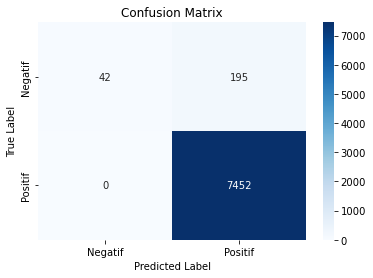

In [38]:
from sklearn import metrics
import seaborn as sns
conf_mat = metrics.confusion_matrix(y_train, predictions_linear_train)
class_label = ['Negatif','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Dari gambar di atas, dapat dijelaskan evaluasi kinerja model klasifikasi biner yaitu:
- True Positif (TP): Jumlah sampel yang benar diprediksi sebagai positif sebesar 7452
- False Negatif (FN): Jumlah sampel yang seharusnya positif tetapi salah diprediksi sebagai negatif sebesar 0
- False Positif (FP): Jumlah sampel yang seharusnya negatif tetapi salah diprediksi sebagai positif sebesar 195
- True Negatif (TN): Jumlah samep yang benar diprediksi sebagai negatif sebesar 42

###  Testing Predictions

In [39]:
predictions_linear = model.predict(x_testidf)

print('\nClassification report:')
cr_linear = classification_report(y_test, predictions_linear)
print(cr_linear)


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        65
           1       0.97      1.00      0.98      1858

    accuracy                           0.97      1923
   macro avg       0.98      0.52      0.52      1923
weighted avg       0.97      0.97      0.95      1923



Hasil dari pelatihan model menggunakan data test pada algoritma SVM didapatkan akurasi sebesar 0.97

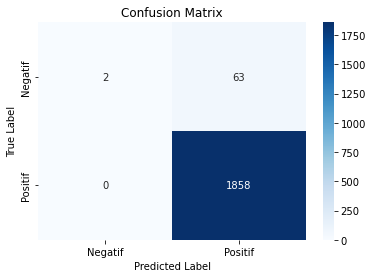

In [40]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, predictions_linear)
class_label = ['Negatif','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Dari gambar di atas, dapat dijelaskan evaluasi kinerja model klasifikasi biner yaitu:

- True Positif (TP): Jumlah sampel yang benar diprediksi sebagai positif sebesar 1858
- False Negatif (FN): Jumlah sampel yang seharusnya positif tetapi salah diprediksi sebagai negatif sebesar 0
- False Positif (FP): Jumlah sampel yang seharusnya negatif tetapi salah diprediksi sebagai positif sebesar 63
- True Negatif (TN): Jumlah samep yang benar diprediksi sebagai negatif sebesar 2

In [41]:
from sklearn.metrics import classification_report,accuracy_score
acc_linear = accuracy_score(y_test,predictions_linear)
acc_linear

0.9672386895475819

Didapatkan nilai akurasi dari model Support Vector Machine sebesar 0.967 atau 0.97

## Random Forest

In [42]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=110)
model.fit(x_trainidf, y_train)

RandomForestClassifier(random_state=110)

### Training Predictions

In [43]:
predictions_rf_train = model.predict(x_trainidf)

print('\nClassification report:')
cr_rf_train = classification_report(y_train, predictions_rf_train)
print(cr_rf_train)


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00      7452

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689



Hasil dari pelatihan model menggunakan data train pada algoritma RF didapatkan akurasi sebesar 1.00

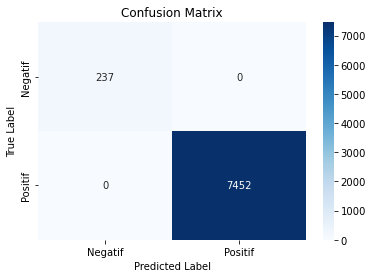

In [44]:
from sklearn import metrics
import seaborn as sns
conf_mat = metrics.confusion_matrix(y_train, predictions_rf_train)
class_label = ['Negatif','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Dari gambar di atas, dapat dijelaskan evaluasi kinerja model klasifikasi biner yaitu:

- True Positif (TP): Jumlah sampel yang benar diprediksi sebagai positif sebesar 7452
- False Negatif (FN): Jumlah sampel yang seharusnya positif tetapi salah diprediksi sebagai negatif sebesar 0
- False Positif (FP): Jumlah sampel yang seharusnya negatif tetapi salah diprediksi sebagai positif sebesar 237
- True Negatif (TN): Jumlah samep yang benar diprediksi sebagai negatif sebesar 0

### Testing Predictions

In [45]:
predictions_rf = model.predict(x_testidf)

print('\nClassification report:')
cr_rf_linear = classification_report(y_test, predictions_rf)
print(cr_rf_linear)


Classification report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        65
           1       0.97      1.00      0.98      1858

    accuracy                           0.97      1923
   macro avg       0.73      0.51      0.51      1923
weighted avg       0.95      0.97      0.95      1923



Hasil dari pelatihan model menggunakan data test pada algoritma RF didapatkan akurasi sebesar 0.97

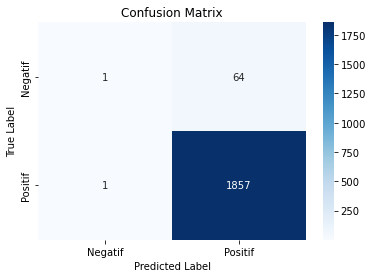

In [46]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, predictions_rf)
class_label = ['Negatif','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Dari gambar di atas, dapat dijelaskan evaluasi kinerja model klasifikasi biner yaitu:

- True Positif (TP): Jumlah sampel yang benar diprediksi sebagai positif sebesar 1857
- False Negatif (FN): Jumlah sampel yang seharusnya positif tetapi salah diprediksi sebagai negatif sebesar 1
- False Positif (FP): Jumlah sampel yang seharusnya negatif tetapi salah diprediksi sebagai positif sebesar 1
- True Negatif (TN): Jumlah samep yang benar diprediksi sebagai negatif sebesar 64

In [47]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_rf = accuracy_score(y_test,predictions_rf)
accuracy_rf

0.9661986479459178

Didapatkan nilai akurasi dari model Support Vector Machine sebesar 0.966 atau 0.97

## I. Kesimpulan

Setiap algoritma perbandingan model memiliki nilai yang hampir sama. tetapi algoritma yang paling baik diterapkan pada data ini yaitu Support Vector Machine dengan nilai evaluasi sebesar 0.967.